# Introductin to neural network classification with tensorflow

#### A neural network is a network of neurons, these neurons take an input and learn from certain features in the input and then produce an output

in this notebook we're going to see how to write neural networks for classification problems

**Classification problems**

The goal of a classification problem is to classify something as one thing or another

**Binary classification**

The goal of a binary classification problem is to classify something as one thing or another

**Multiclass classification**

Multiclass classification is a type of classification problem where the goal is to predict the class of an input sample from a set of more than two possible classes.

**Multilabel classification**

Multilabel classification is commonly used in applications such as image classification, where an image may contain
multiple obiects or attributes that need to be identified.

In [2]:
# Create data to view and fit

from sklearn.datasets import make_circles

# Make 1000 examples

n_samples = 1000

# Create circles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


### our data is little bit complex so we need to visualize it

In [3]:
# import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [4]:
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
# col 0 is x0 and col 1 is x1

circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


<Axes: xlabel='X0', ylabel='X1'>

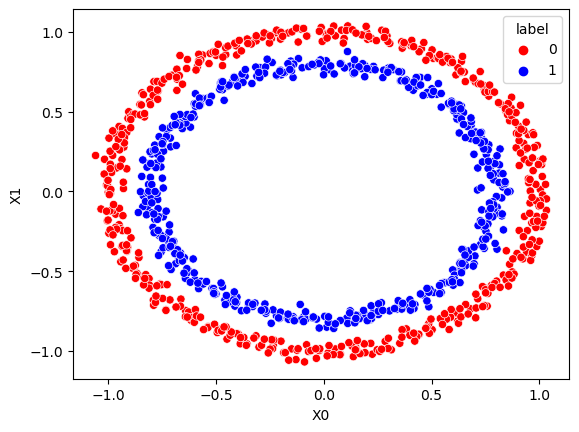

In [5]:
# visualize with a plot
sns.scatterplot(x="X0",y="X1",hue="label",data=circles,palette=["red","blue"])

## input and output shapes

In [6]:
# check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

## steps in modelling

1. get the data ready

2. create a model

3. fit the model

4. evaluate the model

5. improve the model


In [9]:
# set random seed

tf.random.set_seed(42)

# create the model using the sequential API

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

# fit the model

model_1.fit(X,y,epochs=100)



Epoch 1/100


2023-08-21 21:00:44.178321: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 1s 7ms/step - loss: 5.9554 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 5.9386 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 5.9258 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 5.9000 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 10ms/step - loss: 5.8876 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 9ms/step - loss: 5.8422 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 5.8370 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 11ms/step - loss: 5.8344 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 5.8245 - accuracy: 0.4860
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 5.8210 - accuracy: 0.4860
Epoch 11/100
32/32 

In [10]:
# summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:

model_1.fit(X,y,epochs=200,verbose=0)
# Evaluate the model
model_1.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.7155 - accuracy: 0.4940


[0.7155188322067261, 0.49399998784065247]

Since we're working on a binary classification problem and our model is getting 
around 50% accuracy, it's likely our model is predicting 1s and 0s at random.

So how do we improve our model?

**let add an extra layer and increase the number of hidden units in each layer**

In [12]:
# set random seed

tf.random.set_seed(42)

# 1. build the model

model2=tf.keras.Sequential([
    tf.keras.layers.Dense(100), # hidden layer
    tf.keras.layers.Dense(1) # output layer
])

# 2. compile the model

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3. fit the mode

model2.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 8ms/step - loss: 3.2808 - accuracy: 0.4510
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.7297 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6957 - accuracy: 0.4620
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.4620
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5160
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.5050
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6947 - accuracy: 0.4920
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6946 - accuracy: 0.4490
Epoch 11/

In [13]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.7155 - accuracy: 0.4940


[0.7155188322067261, 0.49399998784065247]

## improve our model

In [8]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [15]:
# set random seed

tf.random.set_seed(42)

# 1. build the model

model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100), # hidden layer
    tf.keras.layers.Dense(10), # hidden layer
    tf.keras.layers.Dense(1) # output layer
])

# 2. compile the model

model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.legacy.Adam(0.01),
               metrics=["accuracy"])

# 3. fit the mode

model3.fit(x_train,y_train,epochs=100)


Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 1.3567 - accuracy: 0.4863
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7085 - accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7046 - accuracy: 0.4737
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6976 - accuracy: 0.4925
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6991 - accuracy: 0.4913
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6970 - accuracy: 0.4812
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6995 - accuracy: 0.5050
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6990 - accuracy: 0.4725
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6968 - accuracy: 0.4988
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.7032 - accuracy: 0.4913
Epoch 11/

In [16]:
model3.evaluate(x_train,y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5238


[0.6927376389503479, 0.5237500071525574]

In [17]:
# predictions

y_preds=model3.predict(x_test)

y_preds

7/7 [==============================] - 0s 2ms/step


array([[0.48354816],
       [0.48921767],
       [0.50780106],
       [0.5064875 ],
       [0.48964456],
       [0.48719352],
       [0.51673543],
       [0.5073732 ],
       [0.49498284],
       [0.5162168 ],
       [0.49260482],
       [0.5013298 ],
       [0.4991076 ],
       [0.5025785 ],
       [0.4965244 ],
       [0.4875026 ],
       [0.5008319 ],
       [0.51079565],
       [0.5134702 ],
       [0.4877957 ],
       [0.48243234],
       [0.4892951 ],
       [0.5096483 ],
       [0.506155  ],
       [0.48690382],
       [0.51787853],
       [0.4939693 ],
       [0.51618034],
       [0.5201768 ],
       [0.5179114 ],
       [0.49045503],
       [0.52127755],
       [0.49068338],
       [0.52631354],
       [0.4877069 ],
       [0.4825873 ],
       [0.5246459 ],
       [0.5162796 ],
       [0.50531864],
       [0.5198162 ],
       [0.50563836],
       [0.5138921 ],
       [0.51776403],
       [0.48707995],
       [0.5220667 ],
       [0.5155322 ],
       [0.5071313 ],
       [0.499

to visualize our model's predictions, let's create a function `plot_decision_boundary()` to plot and compare them


In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, x, y):
    """
    Plot the multiclass decision boundary for a model that accepts 2D inputs.

    Arguments:
    model {function} -- trained model with function model.predict(x_in).
    x {numpy.ndarray} -- 2D inputs with shape (N, 2).
    y {numpy.ndarray} -- 1D outputs with shape (N,).
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    # Create x value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)

    plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())




313/313 [==============================] - 0s 1ms/step
Doing binary classification


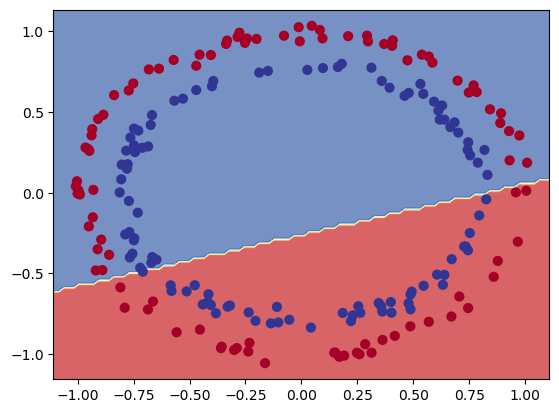

In [19]:
    
# Assuming you have defined `model3`, `x_test`, and `y_test` variables before calling the function.
# Call the function to plot the decision boundary.
plot_decision_boundary(model3, x=x_test, y=y_test)

In [20]:
x_min,x_max=x_test[:,0].min()-0.1,x_test[:,0].max()+0.1
y_min,y_max=x_test[:,1].min()-0.1,x_test[:,1].max()+0.1

x_max,x_min,y_max,y_min

xx,yy=np.meshgrid(
        np.linspace(x_min,x_max,100),
        np.linspace(y_min,y_max,100)
    )

## The missing piece is non-linearity

In [21]:
# set teh random seed
tf.random.set_seed(42)

# 1.create the model
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="linear"),
])

# 2. compile the model

model4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
                metrics=["accuracy"])


# 3. fit the model

model4.fit(x_train,y_train,epochs=100,verbose=0)

/Users/magesh/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
model4.evaluate(x_test,y_test)

7/7 [==============================] - 0s 10ms/step - loss: 0.7031 - accuracy: 0.3400


[0.7030637860298157, 0.3400000035762787]

313/313 [==============================] - 0s 1ms/step
Doing multiclass classification


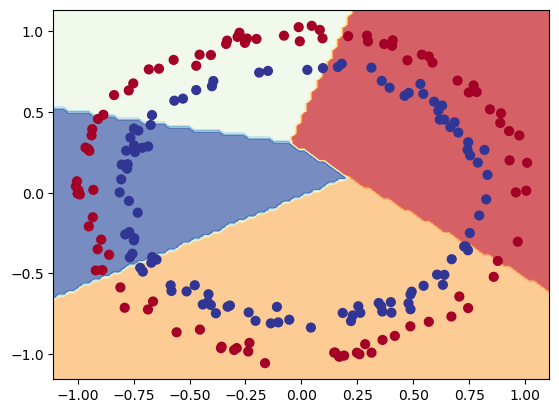

In [23]:
# plot the decision boundary for model4

plot_decision_boundary(model4,x_test,y_test)

## lets try build our first neural network with tensorflow


In [24]:
tf.random.set_seed(42)

# 1.create the model

model5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu"),
])

# 2. compile the model
model5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. fit the model
model5.fit(x_train,y_train,epochs=100,verbose=0)

In [25]:
model5.evaluate(x_test,y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.6996 - accuracy: 0.4650


[0.6996163725852966, 0.4650000035762787]

## let's build the same model using tensorflow's functional API
![tenserflow_play](../notes/images/tenserflow_play.png)

In [26]:
# set random seed
tf.random.set_seed(42)

# 1. create the model

model6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,name="output_layer")

])

# 2. compile the model
model6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. fit the model

model6.fit(x_train,y_train,epochs=300,verbose=2)


Epoch 1/300
25/25 - 0s - loss: 2.4116 - accuracy: 0.4638 - 393ms/epoch - 16ms/step
Epoch 2/300
25/25 - 0s - loss: 0.7112 - accuracy: 0.4787 - 110ms/epoch - 4ms/step
Epoch 3/300
25/25 - 0s - loss: 0.6970 - accuracy: 0.4863 - 108ms/epoch - 4ms/step
Epoch 4/300
25/25 - 0s - loss: 0.6945 - accuracy: 0.4550 - 107ms/epoch - 4ms/step
Epoch 5/300
25/25 - 0s - loss: 0.6959 - accuracy: 0.4212 - 105ms/epoch - 4ms/step
Epoch 6/300
25/25 - 0s - loss: 0.6959 - accuracy: 0.5025 - 105ms/epoch - 4ms/step
Epoch 7/300
25/25 - 0s - loss: 0.6951 - accuracy: 0.4712 - 105ms/epoch - 4ms/step
Epoch 8/300
25/25 - 0s - loss: 0.6950 - accuracy: 0.4850 - 100ms/epoch - 4ms/step
Epoch 9/300
25/25 - 0s - loss: 0.6947 - accuracy: 0.4925 - 100ms/epoch - 4ms/step
Epoch 10/300
25/25 - 0s - loss: 0.6964 - accuracy: 0.5175 - 99ms/epoch - 4ms/step
Epoch 11/300
25/25 - 0s - loss: 0.7045 - accuracy: 0.4900 - 99ms/epoch - 4ms/step
Epoch 12/300
25/25 - 0s - loss: 0.6958 - accuracy: 0.4825 - 99ms/epoch - 4ms/step
Epoch 13/300
25

KeyboardInterrupt: 

In [ ]:
model6.evaluate(x_test,y_test)

7/7 [==============================] - 0s 11ms/step - loss: 7.4811 - accuracy: 0.5150


[7.481100559234619, 0.5149999856948853]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


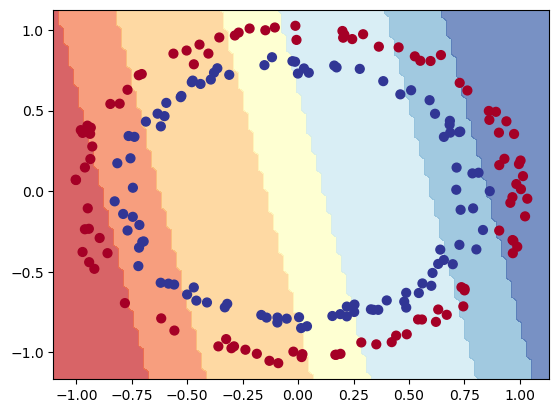

In [ ]:
# plot the decision boundary for model6

plot_decision_boundary(model6,x_test,y_test)

## still not good lets give the final try

In [27]:
# set random seed
tf.random.set_seed(42)

# 1. create the model

model7=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. compile the model

model7.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["accuracy"]
)

# 3. fit the model
history=model7.fit(x_train,y_train,epochs=25,verbose=2)


Epoch 1/25
25/25 - 0s - loss: 0.7027 - accuracy: 0.4688 - 388ms/epoch - 16ms/step
Epoch 2/25
25/25 - 0s - loss: 0.7043 - accuracy: 0.4638 - 106ms/epoch - 4ms/step
Epoch 3/25
25/25 - 0s - loss: 0.7015 - accuracy: 0.5238 - 111ms/epoch - 4ms/step
Epoch 4/25
25/25 - 0s - loss: 0.6991 - accuracy: 0.4963 - 148ms/epoch - 6ms/step
Epoch 5/25
25/25 - 0s - loss: 0.7027 - accuracy: 0.4712 - 107ms/epoch - 4ms/step
Epoch 6/25
25/25 - 0s - loss: 0.7026 - accuracy: 0.5213 - 111ms/epoch - 4ms/step
Epoch 7/25
25/25 - 0s - loss: 0.7008 - accuracy: 0.4850 - 107ms/epoch - 4ms/step
Epoch 8/25
25/25 - 0s - loss: 0.6976 - accuracy: 0.5175 - 104ms/epoch - 4ms/step
Epoch 9/25
25/25 - 0s - loss: 0.6999 - accuracy: 0.4800 - 103ms/epoch - 4ms/step
Epoch 10/25
25/25 - 0s - loss: 0.7003 - accuracy: 0.4988 - 98ms/epoch - 4ms/step
Epoch 11/25
25/25 - 0s - loss: 0.7065 - accuracy: 0.4812 - 101ms/epoch - 4ms/step
Epoch 12/25
25/25 - 0s - loss: 0.6970 - accuracy: 0.4900 - 98ms/epoch - 4ms/step
Epoch 13/25
25/25 - 0s - l

313/313 [==============================] - 0s 1ms/step
Doing binary classification


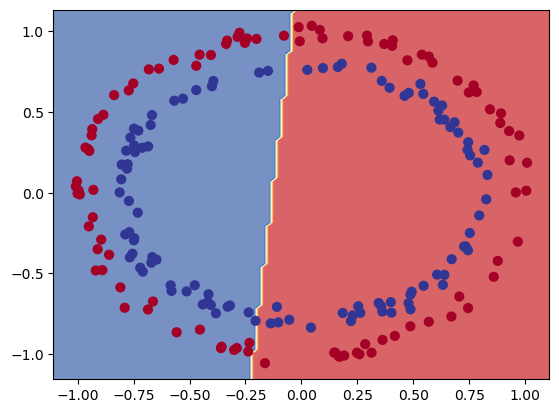

In [28]:
plot_decision_boundary(model7,x_test,y_test)

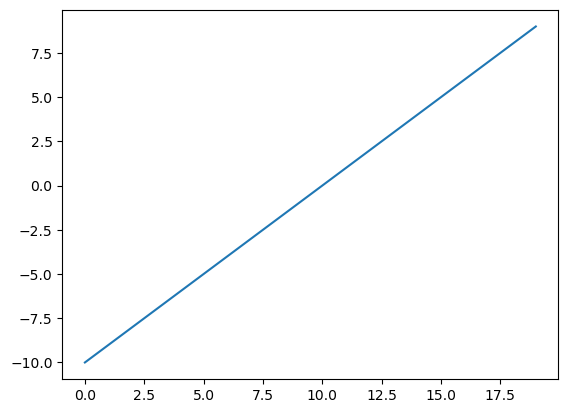

In [29]:
# create a toy a tensor (similar to the data we pass into our model)

toy_tensor = tf.cast(tf.range(-10, 10), tf.float32)

# Visualize our toy tensor

plt.plot(toy_tensor)

 

In [30]:
# lets build our own sigmoid function

def sigmoid(z):
    return 1/(1+np.exp(-z))

# use our sigmoid function on our data

sigmoid_preds = sigmoid(toy_tensor)
sigmoid_preds


array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)

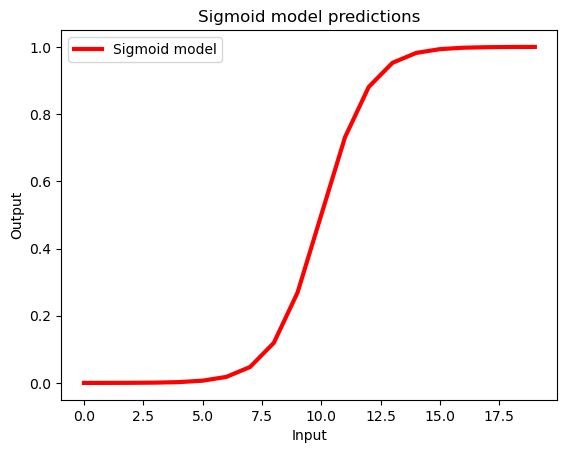

In [31]:
# plot the sigmoid_preds

# plt.plot(toy_tensor,c='b', lw=3, label='Toy model')
plt.plot(sigmoid_preds, c='r', lw=3, label='Sigmoid model')

plt.title('Sigmoid model predictions')
plt.xlabel('Input')
plt.ylabel('Output')

plt.legend()


In [32]:
# Let's recreate the relu function

def relu(x):
	return tf.maximum(0, x)

# pass a toy tensor
relu(toy_tensor)


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

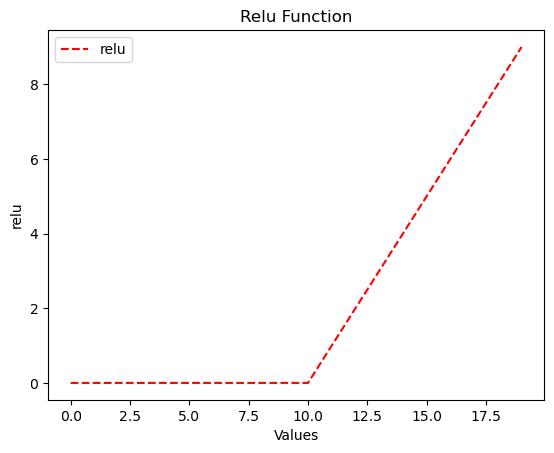

In [33]:
# plot Relu

plt.plot( relu(toy_tensor), label='relu', color='red', linestyle='--' )

plt.xlabel('Values')
plt.ylabel('relu')
plt.title('Relu Function')

plt.legend()

plt.show()

In [34]:
# lets try the linear activation function

tf.keras.activations.linear(toy_tensor)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

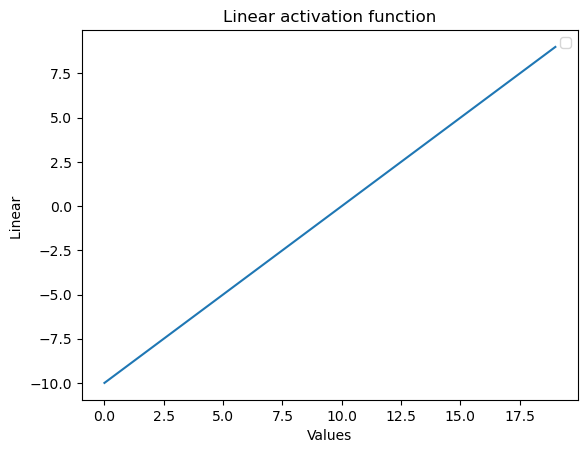

In [35]:
# plot linear activation function

plt.plot(tf.keras.activations.linear(toy_tensor))


plt.xlabel('Values')
plt.ylabel('Linear ')
plt.title('Linear activation function')

plt.legend()

plt.show()

## Evaluation of the model


313/313 [==============================] - 1s 2ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


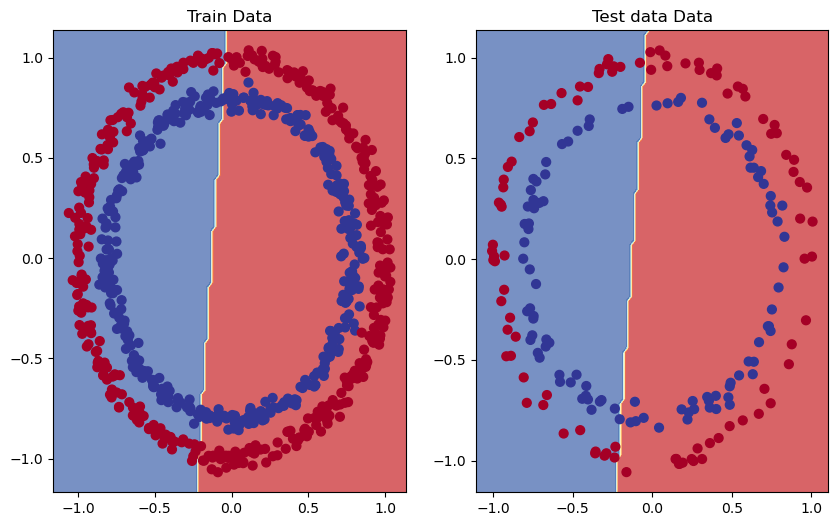

In [36]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)

plt.title("Train Data")

plot_decision_boundary(model7,x_train,y_train)

plt.subplot(1,2,2)
plt.title("Test data Data")
plot_decision_boundary(model7,x_test,y_test)

## plot the loss curve

In [38]:
history.history

{'loss': [0.7026847004890442,
  0.704298734664917,
  0.701458215713501,
  0.699149489402771,
  0.7027109265327454,
  0.7025694847106934,
  0.7008339166641235,
  0.6975976824760437,
  0.6999151706695557,
  0.700298547744751,
  0.7065268158912659,
  0.697004497051239,
  0.7038544416427612,
  0.6984817385673523,
  0.6999402046203613,
  0.7039545178413391,
  0.7041027545928955,
  0.700981855392456,
  0.7022110223770142,
  0.6981674432754517,
  0.6959632635116577,
  0.6996369361877441,
  0.6955293416976929,
  0.6997222304344177,
  0.6961627006530762],
 'accuracy': [0.46875,
  0.4637500047683716,
  0.5237500071525574,
  0.4962500035762787,
  0.4712499976158142,
  0.5212500095367432,
  0.48500001430511475,
  0.5174999833106995,
  0.47999998927116394,
  0.4987500011920929,
  0.48124998807907104,
  0.49000000953674316,
  0.48374998569488525,
  0.5074999928474426,
  0.5049999952316284,
  0.47749999165534973,
  0.48750001192092896,
  0.4950000047683716,
  0.4300000071525574,
  0.5074999928474426,

In [39]:
# conver the history obj into dataframe
df=pd.DataFrame(history.history)


<Axes: >

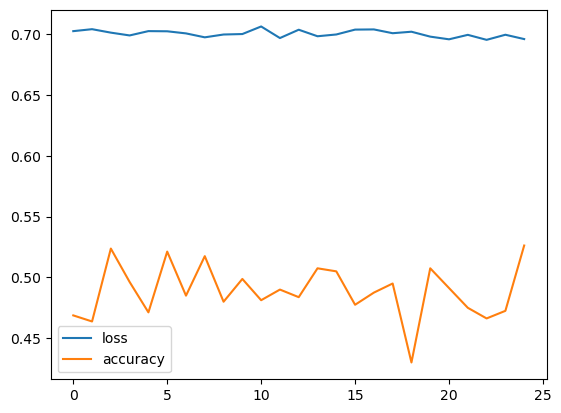

In [40]:
df.plot()

In [41]:
# set random seed

tf.random.set_seed(42)

# 1. create the model

model8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. compile the model

model8.compile(
    loss="binary_crossentropy",
    optimizer="Adam",
    metrics=["accuracy"]
)


# create a learning rate callback

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# 3. fit the model (passing lr_sheduler)

history_8=model8.fit(x_train,y_train,epochs=100,callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6979 - accuracy: 0.4925 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6978 - accuracy: 0.4900 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.4900 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6977 - accuracy: 0.4900 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6976 - accuracy: 0.4888 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6975 - accuracy: 0.4888 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6973 - accuracy: 0.4900 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6972 - accuracy: 0.4888 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

<Axes: >

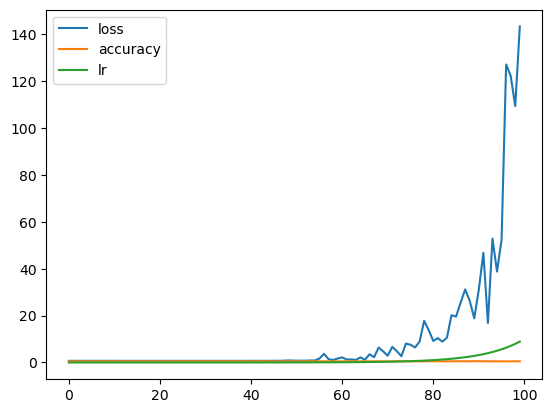

In [42]:
# check out history 

df2=pd.DataFrame(history_8.history)

df2.plot()

Text(0.5, 1.0, 'lr vs loss')

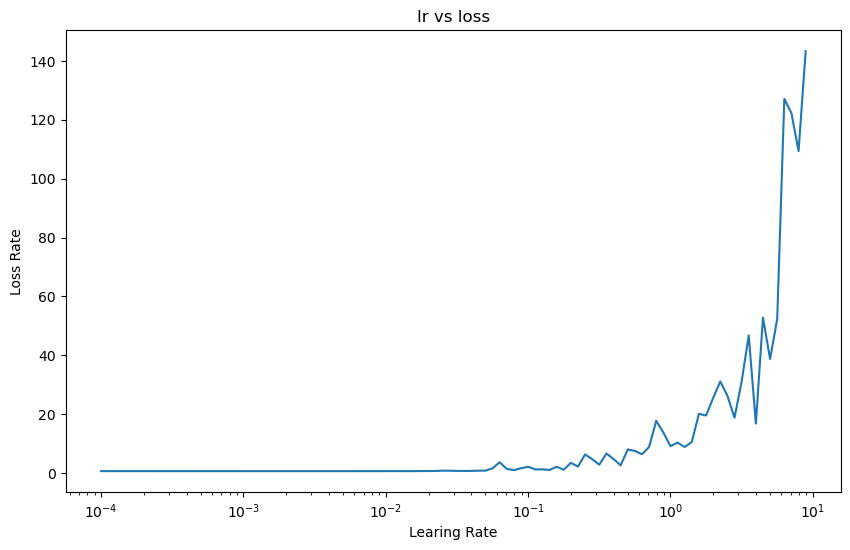

In [43]:
# plot the lr with loss

lrs=1e-4 * ( 10 ** (tf.range(100)/20))

plt.figure(figsize=(10,6))

plt.semilogx(lrs,history_8.history["loss"]) # x-lrs y->loss

plt.xlabel("Learing Rate")
plt.ylabel("Loss Rate")

plt.title("lr vs loss")

In [9]:
# build the model with ideal learning rate

# set random seed

tf.random.set_seed(42)

# 1. create the model

model9=tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. compile the model

model9.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=["accuracy"]
)


# create a learning rate callback

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

# 3. fit the model (passing lr_sheduler)

history_9=model9.fit(x_train,y_train,epochs=30,callbacks=[lr_scheduler])


Epoch 1/30


2023-08-23 16:20:27.172309: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25/25 [==============================] - 1s 6ms/step - loss: 0.7375 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/30
25/25 [==============================] - 0s 6ms/step - loss: 0.7358 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/30
25/25 [==============================] - 0s 6ms/step - loss: 0.7339 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/30
25/25 [==============================] - 0s 6ms/step - loss: 0.7320 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 0.7300 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/30
25/25 [==============================] - 0s 6ms/step - loss: 0.7280 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/30
25/25 [==============================] - 0s 6ms/step - loss: 0.7259 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/30
25/25 [==============================] - 0s 6ms/step - loss: 0.7239 - accuracy: 0.4975 - lr: 2.2387e-04
Epoch 9/30
25/25 [==============================] - 0s 6ms/step - loss: 0.7218 - accuracy: 

## More classification evaluation methods

Alongside visualizing our models results as much as possible,
there are handful of other classification  evaluation methods &
metrics you should familiar with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from sklearn.metrics)

In [10]:
# check the accuracy
loss,accuracy=model9.evaluate(x_test,y_test)
print(f"the loss is {loss} and the accuracy is {accuracy*100:.2f}%")

7/7 [==============================] - 0s 11ms/step - loss: 0.7048 - accuracy: 0.4800
the loss is 0.7048277854919434 and the accuracy is 48.00%


In [12]:
# create a confusion matrix

from sklearn.metrics import confusion_matrix

# make predictions
y_preds=model9.predict(x_test)

confusion_matrix(y_test,y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

looks like our predictions array has come out in **predicion probability** form .. the standard output from the sigmoid (or softmax) activatoin function

In [13]:
# convert prediction probability to binarty format and view the ifrst 10

converted_y_preds=tf.round(y_preds)

In [14]:
# create the confuccion matrix

cm=confusion_matrix(y_test,converted_y_preds)

## lets make our confussion matrix prettier 🏖

<Axes: >

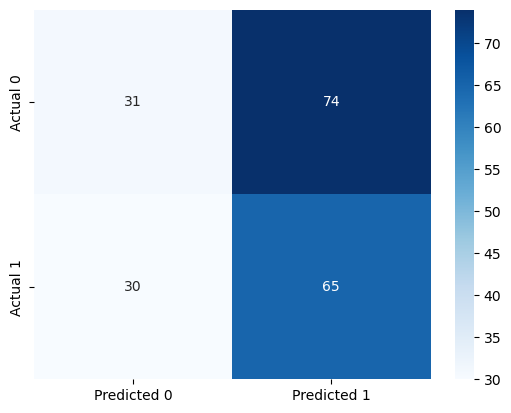

In [16]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])

# Working wirh larger example (multiclass classification)

when you have more than two classes as an option, it's known as **multi-class classification** .

* this means if you have 3 different classes, it's multiclass classificatoin

* It also means if your have 100 different classes , its' multi-class classification

To practice multiclass classification, we're going to build a neural netwoek to classify image of different item

In [17]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test data

(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


labels
Each training and test example is assigned to one of the following labels:



---


**Label	Description**

0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [18]:
# check the shape 
train_data[0].shape,train_labels[0].shape

((28, 28), ())

## plot the image

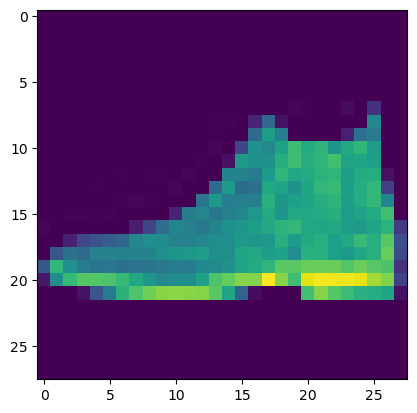

In [19]:
import matplotlib.pyplot as plt

plt.imshow(test_data[0])


In [20]:
# create a small list so we can index onto our training labels

class_names=["T-shirt/top","Trouser",	"Pullover",	"Dress",	"Coat",	"Sandal",	"Shirt",	"Sneaker",	"Bag",	"Ankle boo"]


Text(0.5, 1.0, 'Shirt')

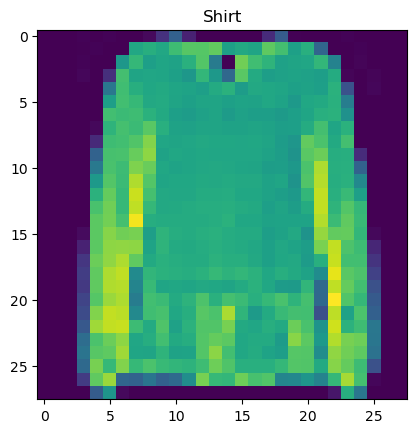

In [21]:
# plot an example image with label
idx=18
plt.imshow(train_data[idx])
plt.title(class_names[train_labels[idx]])

In [22]:
import random
# Plot multiple random images with labels
figsize=(10,15)
def plot_random_images(size=10):
  plt.figure(figsize=figsize)
  for i in range(size):
    ax=plt.subplot(5,5,i+1)
    random_idx=random.choice(range(len(train_data)))
    _image=train_data[random_idx]
    _label=class_names[train_labels[random_idx]]
    plt.imshow(_image)
    plt.title(_label)



  


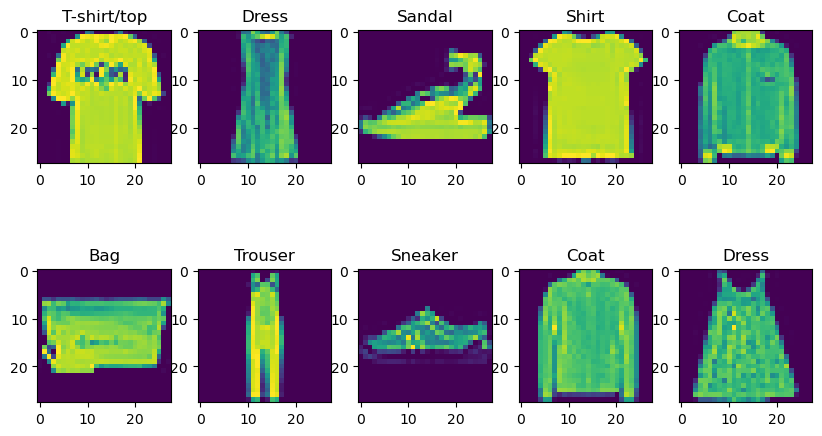

In [23]:
plot_random_images()

## Build a multi-class classification model ⛰

For our multi-class classification model, we can use similar architecture to use binary classifier, however, we're going to have tweak little bit

* Input shape=28x28 (the shape of image)
* Output shape=10(one per class of clothing)
* Loss Function=tf.keras.losses.CategoricalCrosstentropy()
* Output layers activation= softmax()

In [24]:
# out data need to be flattern from (28 x 28 to None,784)

flatten_model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])


In [28]:
# set random seed

tf.random.set_seed(42)

# 1. create the model

model_1=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation="softmax"),
    ]
)

# 2. compile the model

model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.1),
    metrics=["accuracy"]
)

# Fit the model

non_norm_history=model_1.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data,test_labels)
)

Epoch 1/10


/Users/magesh/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1875/1875 [==============================] - 12s 6ms/step - loss: 2811.4370 - accuracy: 0.3044 - val_loss: 1921.1554 - val_accuracy: 0.3858
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2709.7283 - accuracy: 0.3546 - val_loss: 2510.2495 - val_accuracy: 0.3113
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2673.6514 - accuracy: 0.3622 - val_loss: 3239.1306 - val_accuracy: 0.4191
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2727.7283 - accuracy: 0.3664 - val_loss: 2779.2583 - val_accuracy: 0.3693
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2830.8679 - accuracy: 0.3692 - val_loss: 3297.1682 - val_accuracy: 0.3046
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2767.2668 - accuracy: 0.3731 - val_loss: 4047.8096 - val_accuracy: 0.3446
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2777.8005 - accuracy: 0.3770

In [27]:
model_1.evaluate(train_data,train_labels)

1875/1875 [==============================] - 8s 5ms/step - loss: 5.0600 - accuracy: 0.3883


[5.059956073760986, 0.3882666528224945]